# Evaluierung

<function matplotlib.pyplot.show(close=None, block=None)>

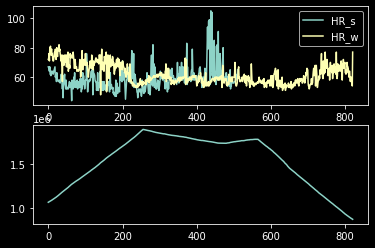

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal

df_sensor = pd.read_csv("Sensordata/clean/01122021_sensor_data")
df_withings = pd.read_csv("Withings_Data/clean/01122021_withings_data")

hr_sensor = df_sensor["hr_sensor"].to_list()
hr_withings = df_withings["hr_withings"].to_list()

cross_corr = signal.correlate(hr_withings, hr_sensor, "same")
plt.subplot(211)
plt.plot(hr_sensor, label="HR_s")
plt.plot(hr_withings, label="HR_w")
plt.legend()
plt.subplot(212)
plt.plot(cross_corr)
plt.show